In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Unsupervised Learning

Unsupervised learning aims to find patterns in data. Pattern discovery is guided by labels. There is no prediction task in mind at the start. 

In [4]:
iris_data = datasets.load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
X = iris_data['data']

In the below code cell we use KMeans to cluster the input data X into three distinct categories. The model does not know before hand what the label of each sample should be. It finds the 'hidden' pattern.

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3) # Three clusters for three iris types
model.fit(X)
labels = model.predict(X)

print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [7]:
new_samples = np.array([
    [5.7, 4.4, 1.5, 0.4],
    [6.5, 3.0, 5.5, 1.8],
    [5.8, 2.7, 5.1, 1.9]
])

new_labels = model.predict(new_samples)
new_labels

array([1, 0, 2])

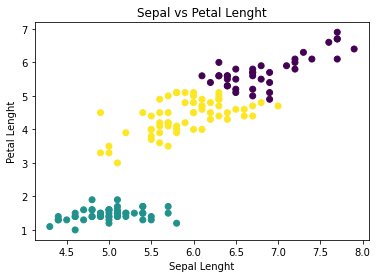

In [8]:
xs = X[:,0] # Sepal Lenght
ys = X[:, 2] # Petal Lenght

plt.scatter(xs, ys, c = labels)
plt.title('Sepal vs Petal Lenght')
plt.xlabel('Sepal Lenght')
plt.ylabel('Petal Lenght')
plt.show()

In [9]:
# To see cluster centres:

centroids = model.cluster_centers_

centroids

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

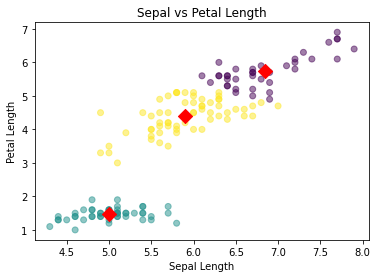

In [10]:
xs = X[:,0] # Sepal Lenght
ys = X[:, 2] # Petal Lenght

centroids_x = centroids[:,0]
centroids_y = centroids[:,2]

plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y, marker = 'D', s = 100, color = 'red')
plt.title('Sepal vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

Check clusters vs. known labels to assess quality.

In [11]:
labels = pd.Series(labels)

species_map = {
    0: 'setosa', 
    1: 'versicolor',
    2: 'virginica'
}

species = labels.map(species_map)

In [12]:
full_data = pd.DataFrame({
    'labels': labels,
    'species': species
})

full_data

,labels,species
0,1,versicolor
1,1,versicolor
2,1,versicolor
3,1,versicolor
4,1,versicolor
...,...,...
145,0,setosa
146,2,virginica
147,0,setosa
148,0,setosa


In [13]:
pd.crosstab(full_data['labels'], full_data['species'])

species,setosa,versicolor,virginica
labels,,,
0,38,0,0
1,0,50,0
2,0,0,62


Above, Versicolor was accurately predicted. Virginica was close behind but Versicolor performed poorly. However, at least we can see the output. What if a dataset doesn't have the labels we're looking for? Need to measure the quality based on the samples.

Measured by inertia: How spread out clusters are. Looking for lower values.

In [14]:
model.inertia_

78.851441426146

C:\Users\Dillon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


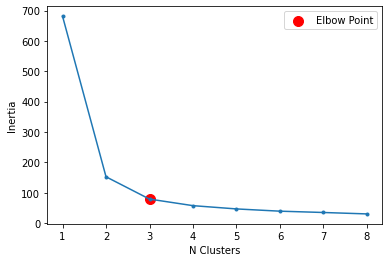

In [15]:
x_range = np.arange(1,9)
inertia_values = []

for i in x_range:
    model = KMeans(n_clusters= i)
    model.fit(X)
    model.predict(X)

    inertia_values.append(model.inertia_)


plt.plot(x_range, inertia_values, marker = '.')
plt.scatter(x_range[2], inertia_values[2], color = 'red', label = 'Elbow Point', s = 100)
plt.xlabel('N Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

## Transforming Features for Better Clusterings

Features in samples can sometimes be extremely varied in terms of their variance. A standard scaler should be used to scale the data. In case of data that is seperate from each sample, use Normalizer. 

In [67]:
wine_data = datasets.load_wine()
wine_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [17]:
X = wine_data['data']
cols = wine_data['feature_names']

wine = pd.DataFrame(X, columns=cols)
wine.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

wine_trans = pd.DataFrame(X_transformed, columns=cols)
wine_trans.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [19]:
# Putting it all together
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
model = KMeans(n_clusters = 3)

steps = [
    ('scaler', scaler),
    ('model', model)
]

pipe = Pipeline(steps)

labels = pipe.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [20]:
wine_data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [21]:
labels = pd.Series(labels)

class_map = {
    0: 'Class 0',
    1: 'Class 1',
    2: 'Class 2'
}

varieties = labels.map(class_map)

pd.crosstab(labels, varieties)

col_0,Class 0,Class 1,Class 2
row_0,,,
0,51,0,0
1,0,62,0
2,0,0,65


## Hierarchical Clustering

Humans + Apes -> Mammals -> Animals. Hierarchy!
- Everything starts in its own cluster. 
- At each step the two closest clusters are merged. 

This is only one type of hierarchical clustering. 

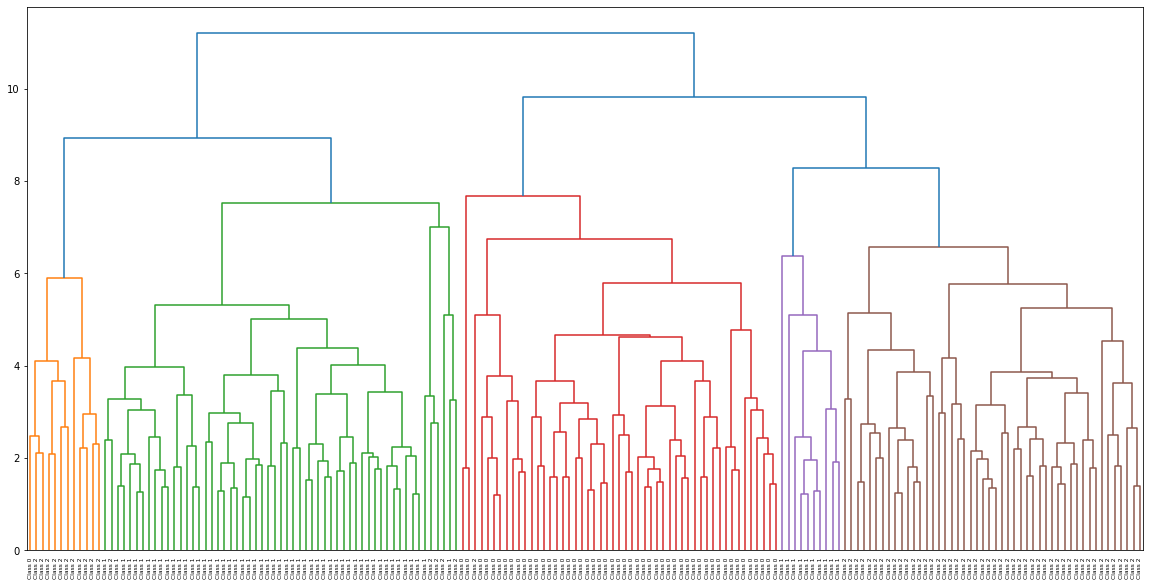

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram

# linkage performs the hierarchical clustering on wine data 
lst = list(varieties)
plt.figure(figsize= (20,10))

mergings = linkage(X_transformed, method = 'complete')
dendrogram(
    mergings, 
    labels = lst,
    leaf_rotation = 90,
    leaf_font_size = 6
)

plt.show()

We are also abel to extract clusters from within the dendrogram. Height corresponds to the distance, measured by the linkage method. 
- fcluster is used on the linkage argument output. 
- The number denotes the distance you want to cut across based on linkage argument. 
- A lower number will give a larger number of clusters. Hierarchy hasn't been completed yet. 

In [23]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(mergings, 8, criterion='distance')

pairs = pd.DataFrame({
    'labels': labels,
    'class': lst, 
})
pairs.sort_values('labels')

,labels,class
59,1,Class 2
60,1,Class 2
61,1,Class 0
62,1,Class 2
64,1,Class 2
...,...,...
101,5,Class 2
99,5,Class 2
98,5,Class 2
112,5,Class 2


In [24]:
# In this particular case hierarchical clustering does a worse job than kmeans. Why? Possibly because there is no obvious hierarchical relationship between the wine types. 
pd.crosstab(pairs['labels'], pairs['class'])

class,Class 0,Class 1,Class 2
labels,,,
1,1,0,11
2,0,52,5
3,50,0,1
4,0,10,0
5,0,0,48


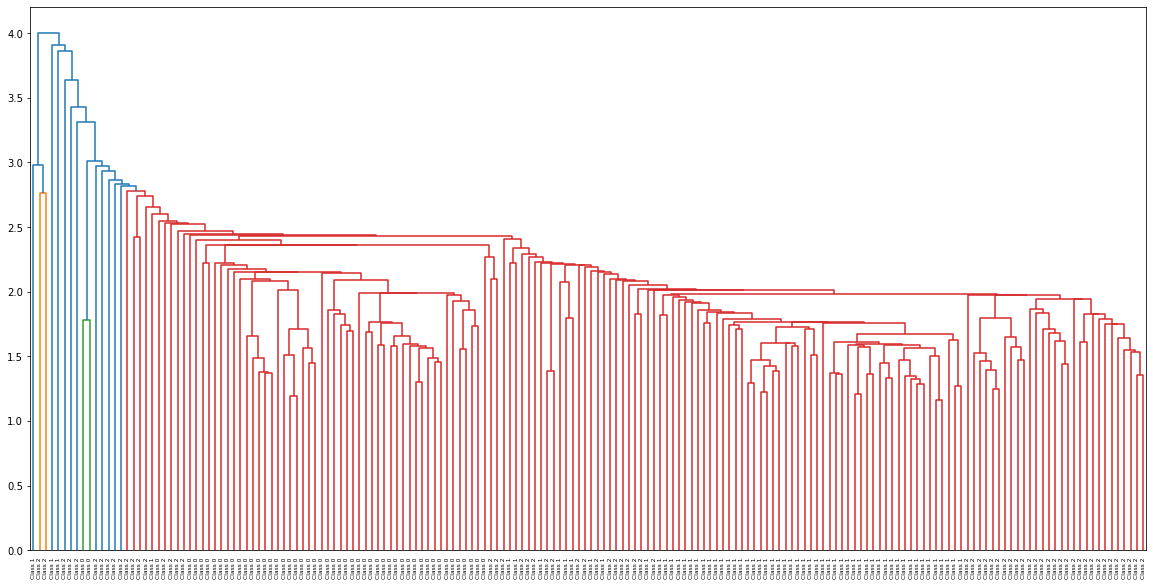

In [25]:
# Using the single method: Clusters are based on their closest pairs.
plt.figure(figsize= (20,10))

mergings = linkage(X_transformed, method = 'single')
dendrogram(
    mergings, 
    labels = lst,
    leaf_rotation = 90,
    leaf_font_size = 6
)

plt.show()

## t-SNE for 2D maps

Using iris: 
- Iris measurements are 4 dimensional. 
- t-SNE does not know there are three species. 
- Graphing it however yields two distinct clusters and a subtler third. 
- t-SNE can give a quick indication of how many clusters might be present.

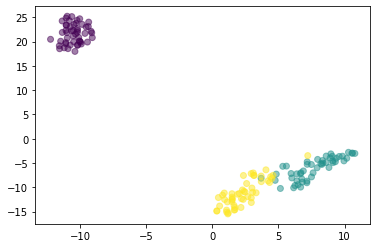

In [26]:
from sklearn.manifold import TSNE

samples = iris_data['data']
labels = iris_data['target']

model = TSNE(learning_rate = 100)
transformed = model.fit_transform(samples)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.show()

t-SNE output is consistent with KMeans elbow plot. KMeans would have had similar output with two or three clusters. 

## Decorrelation and Dimensional Reduction

Dimensional Reduction reduces the noise in a dataset. Say for example there's a dataset with car milage and age. As both will correlate strongly with one another, it might be wise to merge both features into a single feature. This is known as its intrinsic dimension. There's two dimensions, but only one is needed to approximate the data. Significant variance drives intrinsic dimensions.
 
One of the best approaches to this is PCA - Principle Component Analysis. First, it performs decorrelation, followed by dimensional reduction. 

- The principle components are the directions of largest variance in the data. 

Decorrelation happens by first realigning data with the axes, then shifting its mean towards zero.

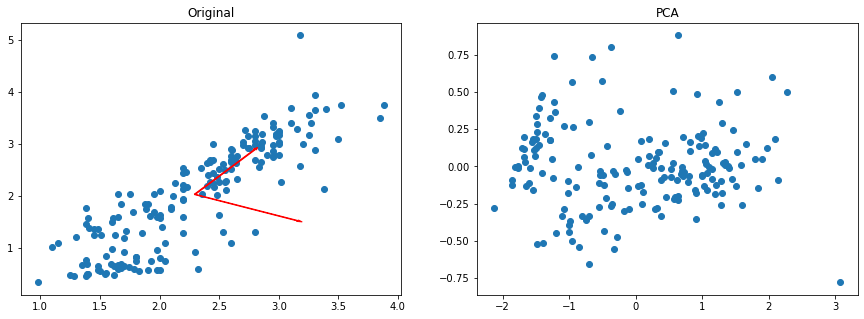

In [77]:
from sklearn.decomposition import PCA

f, ax = plt.subplots(1,2, figsize = (15,5))

# Total Phenols and Flavanoids
samples = wine_data['data'][:,5:7]

model = PCA()
model.fit(samples)
transformed = model.transform(samples)

# To plot component arrows:
mean = model.mean_
components = model.components_

ax[0].arrow(mean[0], mean[1], components[0,0], components[0,1], color = 'red', width = 0.01)
ax[0].arrow(mean[0], mean[1], components[1,0], components[1,1], color = 'red', width = 0.01)

# Original scatter plot
ax[0].scatter(samples[:,0], samples[:,1])
ax[0].title.set_text('Original')

# PCA scatter plot
ax[1].scatter(transformed[:,0], transformed[:,1])
ax[1].title.set_text('PCA')
plt.show()

In [62]:
# To prove decorrelation. pearsonr gives correlation and pvalue
from scipy.stats import pearsonr
print('Orginal:', pearsonr(samples[:,0], samples[:,1])[0])
print('PCA:', pearsonr(transformed[:,0], transformed[:,1])[0])

Orginal: 0.8645635000951147
PCA: 7.7021722333370235e-16


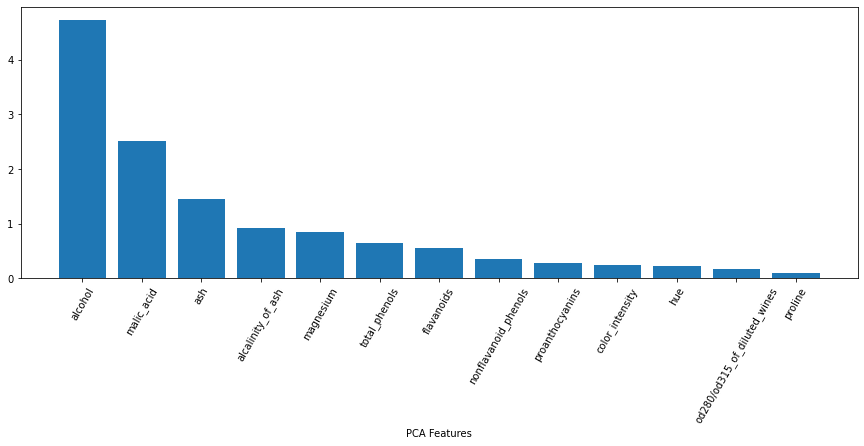

In [71]:
# Checking intrinsic dimensions
samples = wine_trans.loc[:,:]
features = wine_trans.columns

model = PCA()
model.fit_transform(samples)

plt.figure(figsize=(15,5))
plt.bar(features, model.explained_variance_)
plt.xlabel('PCA Features')
plt.xticks(rotation = 60)
plt.show()

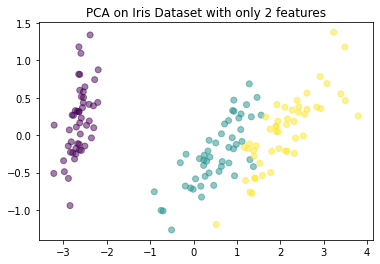

In [93]:
# To illustrate dimension reduction lets go back to iris. 
# n_components specifies how many components to keep.

samples = iris_data['data']
labels

model = PCA(n_components=2)
transformed = model.fit_transform(samples)

xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.title('PCA on Iris Dataset with only 2 features')
plt.show()